### Author : Chaitanya Prakashrao Dabli

In [76]:
# Importing the libraries 

import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [97]:
# Creating a dataset using the image_dataset_from_directory function
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Imgs',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    color_mode= 'grayscale'
)

Found 4000 files belonging to 4 classes.


In [79]:
# Defining the number of classes
num_classes = 4


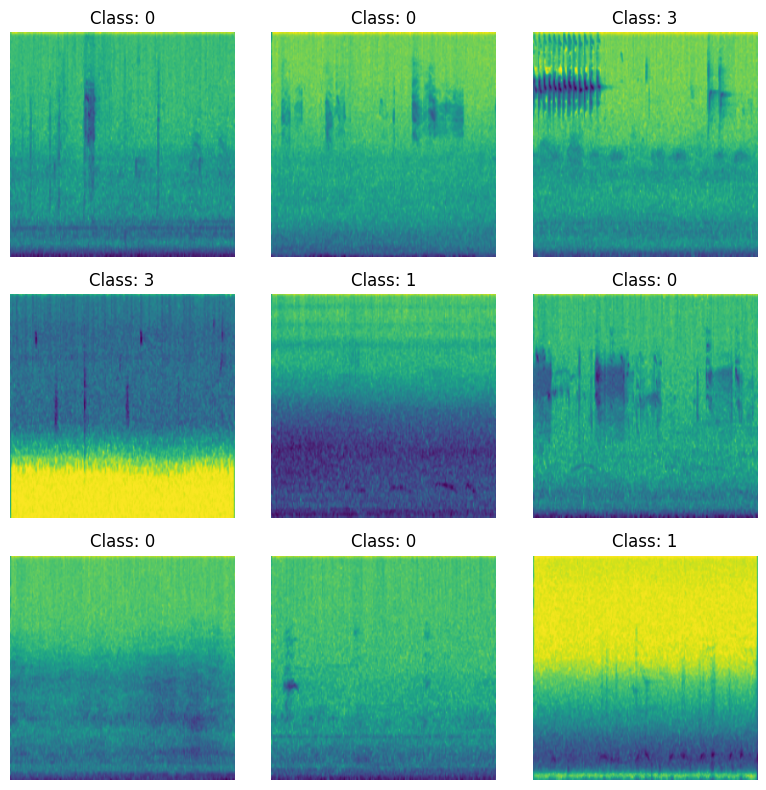

In [80]:
# printing first batch of images and labels
images, labels = next(iter(image_dataset))

# Plotting  9 images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().astype("uint8"))
    ax.set_title(f"Class: {labels[i].numpy()}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [42]:
# Defining percentages of eachsplit
train_split = 0.6
val_split = 0.2
test_split = 0.2

# creating the samples
num_samples = len(image_dataset)
num_train = int(train_split * num_samples)
num_val = int(val_split * num_samples)
num_test = int(test_split * num_samples)

# Splitting the dataset into training, validation, and testing sets
train_dataset = image_dataset.take(num_train)
test_dataset = image_dataset.skip(num_train)
val_dataset = test_dataset.skip(num_test)
test_dataset = test_dataset.take(num_test)

# Normalizing the pixel values 
normalization_layer = Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [44]:
# Defining the model

model = tf.keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])



In [45]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [46]:
# Training model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Epoch 1/10


C:\Users\chait\AppData\Roaming\Python\Python311\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - 176s 2s/step - loss: 1.7469 - accuracy: 0.3388 - val_loss: 1.1867 - val_accuracy: 0.5063
Epoch 2/10
75/75 [==============================] - 171s 2s/step - loss: 1.0995 - accuracy: 0.5442 - val_loss: 0.9252 - val_accuracy: 0.6562
Epoch 3/10
75/75 [==============================] - 177s 2s/step - loss: 0.7472 - accuracy: 0.7429 - val_loss: 0.6928 - val_accuracy: 0.7912
Epoch 4/10
75/75 [==============================] - 182s 2s/step - loss: 0.5833 - accuracy: 0.7942 - val_loss: 0.5551 - val_accuracy: 0.8075
Epoch 5/10
75/75 [==============================] - 183s 2s/step - loss: 0.5155 - accuracy: 0.8308 - val_loss: 0.5226 - val_accuracy: 0.8275
Epoch 6/10
75/75 [==============================] - 171s 2s/step - loss: 0.4339 - accuracy: 0.8567 - val_loss: 0.5021 - val_accuracy: 0.8413
Epoch 7/10
75/75 [==============================] - 172s 2s/step - loss: 0.3886 - accuracy: 0.8754 - val_loss: 0.4630 - val_accuracy: 0.8438
Epoch 8/10
75/75 [======

In [58]:
# Plotting accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


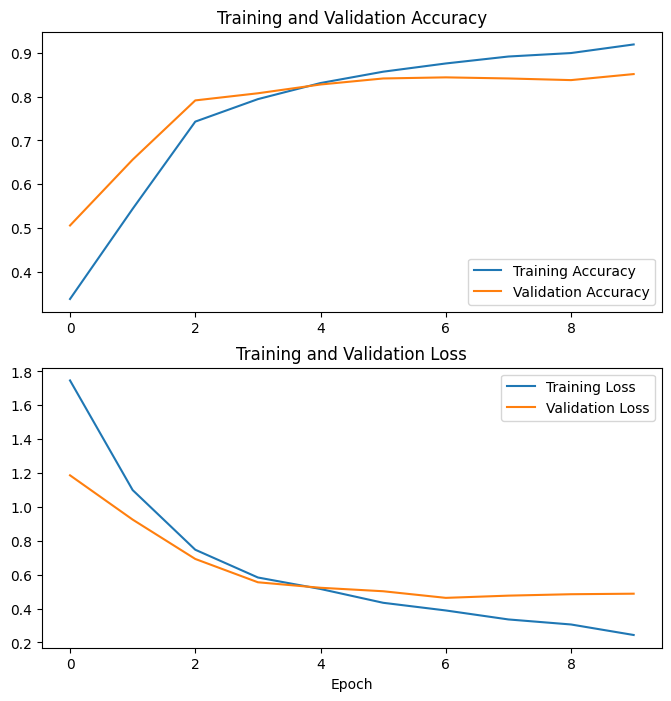

In [59]:
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [55]:
# creating list with class_names
class_names = ['greypartridgespec','stockdovespec','turtledovespec','yellowhammerspec']

Found 4000 files belonging to 4 classes.
Using 800 files for validation.
3/3 [==============================] - 1s 234ms/step


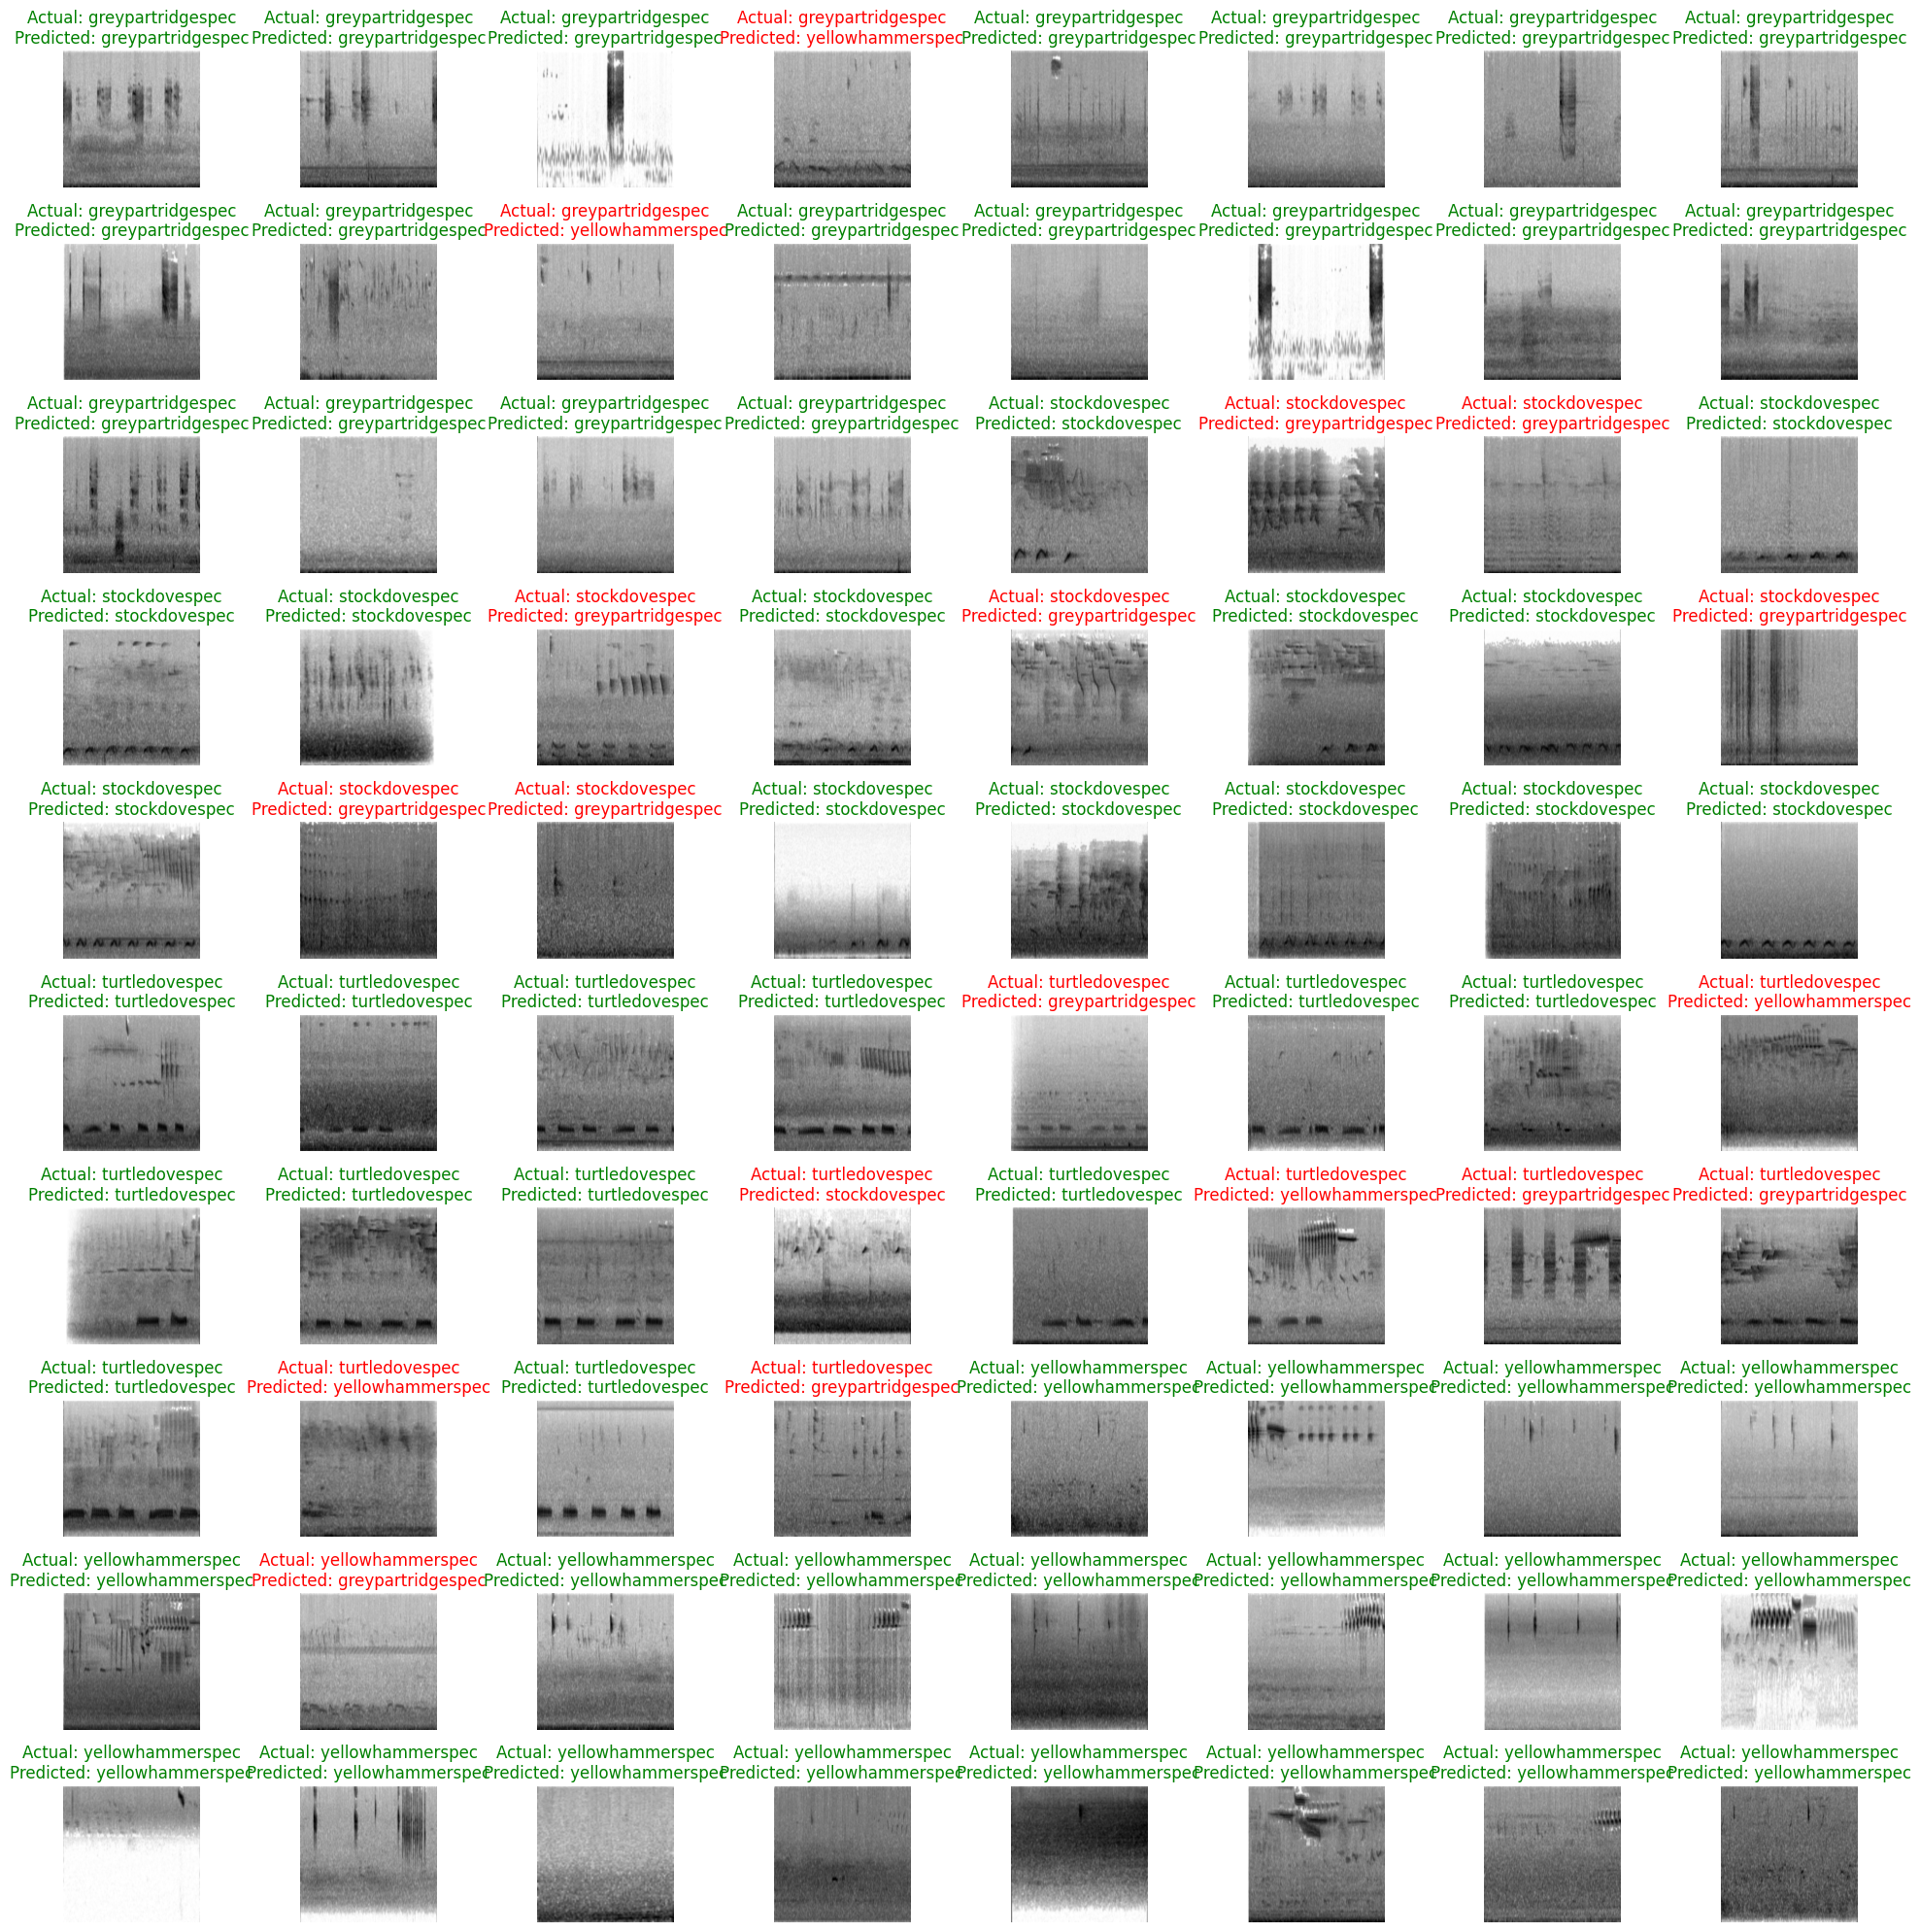

In [94]:
# Loading test dataset to go through model and printing 
image_dataset = keras.preprocessing.image_dataset_from_directory(
    'Imgs',
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

# Getting the predicted labels
test_images, test_labels = [], []
for images, labels in image_dataset:
    test_images.append(images)
    test_labels.append(labels)
test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Select 20 random images from each class in the test dataset
class_names = image_dataset.class_names
random.seed(123)
selected_images = []
selected_labels = []
for class_name in class_names:
    class_indices = np.where(test_labels == class_names.index(class_name))[0]
    selected_indices = np.random.choice(class_indices, size=20, replace=False)
    for index in selected_indices:
        selected_images.append(test_images[index])
        selected_labels.append(test_labels[index])

# Getting the predicted labels for the selected images
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)
selected_predictions = model.predict(selected_images)
selected_predicted_labels = np.argmax(selected_predictions, axis=1)

# Printing the actual and predicted labels for each selected image
fig, axes = plt.subplots(nrows=10, ncols=8, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    actual_label = class_names[selected_labels[i]]
    predicted_label = class_names[selected_predicted_labels[i]]
    if actual_label == predicted_label:
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}", color='green')
    else:
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}", color='red')
    ax.axis("off")

plt.tight_layout()
plt.show()
